In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
corona = pd.read_excel("./고로나_수정.xlsx", sheet_name='고로나')

In [3]:
corona.set_index('Unnamed: 0', inplace=True)

In [4]:
고로나 = corona.loc['2020-02-01' : '2020-05-31'].copy()

In [5]:
고로나

,신규확진,지역확진,해외유입,누계,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
Unnamed: 0,,,,,,,,,,
2020-02-01,5.0,4.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,3.0,1.0,2.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,0.0,0.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,1.0,0.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,2.0,1.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-05-27,40.0,37.0,3.0,11265.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28,79.0,68.0,11.0,11344.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-29,58.0,55.0,3.0,11402.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 건강한 사람들의 dt
def non_fear(건강인, 감염자, 총인구, 공포감):
    dt_S = (-감염률 * 건강인 * 감염자)/총인구 - 공포감 * 건강인 * (1-np.exp(-전환률*격리환자))
    if 건강인 > 0:
        return round(dt_S,7)
    else:
        return 0

# 건강하지만 두려워서 생활패턴이 바뀐 사람들의 dt
def fear(건강인, 무서운_건강인, 감염자, 총인구, 공포감, 거리두기):
    dt_SF =  공포감 * 건강인 * (1-np.exp(-전환률*격리환자)) - (거리두기 * 감염률 * 무서운_건강인 * 감염자)/총인구
    if 무서운_건강인 < 건강인:
        return round(dt_SF,7)
    else:
        return 0

# 잠복기 환자들의 dt
def incubation(건강인, 무서운_건강인, 감염자, 총인구, 거리두기, 잠복환자):
    dt_incu = (감염률 * 건강인 * 감염자)/총인구 + (거리두기 * 감염률 * 무서운_건강인 * 감염자)/총인구 - 잠복환자/잠복기간
    if 잠복환자 < 건강인 + 무서운_건강인:
        return round(dt_incu,7)
    else:
        return 0

# 감염자들의 dt
def infected(잠복환자, 감염자):
    dt_infe = 잠복환자/잠복기간 - 감염자/진단판정
    return round(dt_infe,7)

# 격리자들의 dt
def quarantine(감염자):
    dt_q = 감염자/진단판정 - 회복률 * 격리환자
    return round(dt_q,7)

# 회복된 사람들의 dt
def recoverd():
    dt_R = 회복률 * 격리환자
    return round(dt_R,7)

0.01


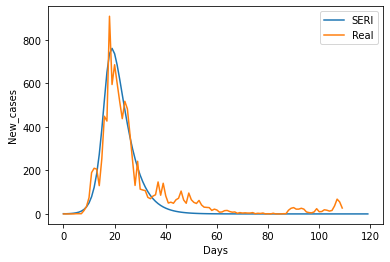

0.02


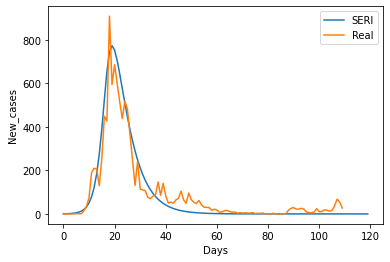

0.03


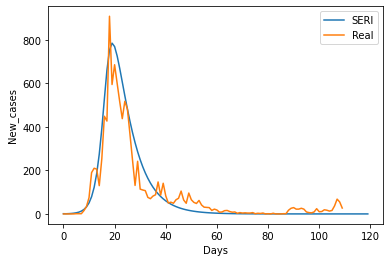

0.04


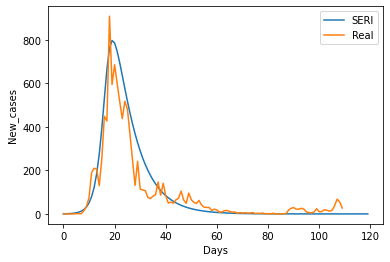

0.05


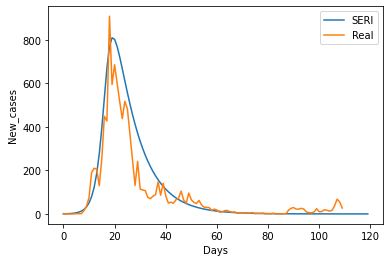

0.060000000000000005


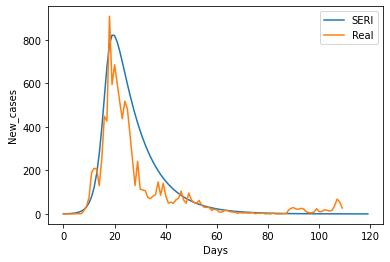

0.06999999999999999


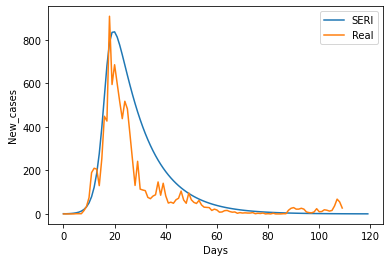

0.08


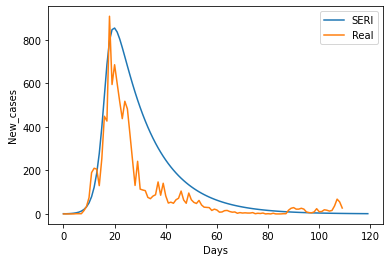

0.09


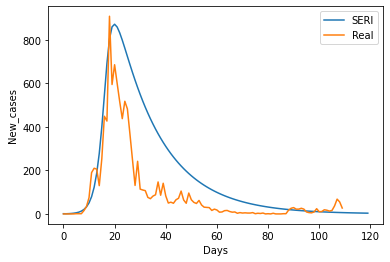

0.09999999999999999


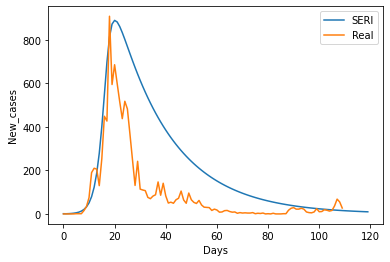

0.11


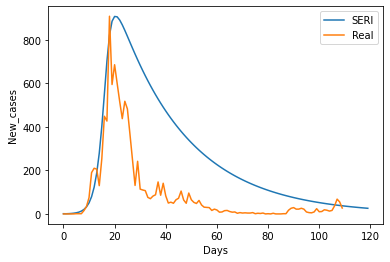

0.12


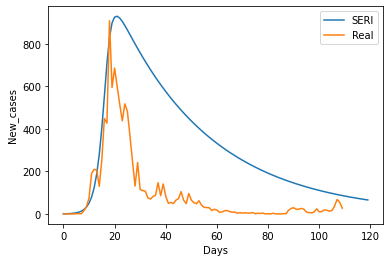

0.13


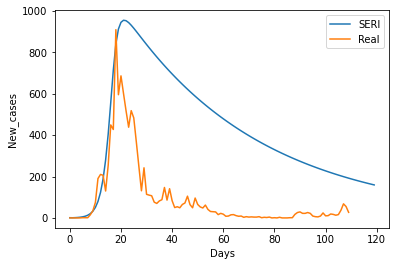

0.14


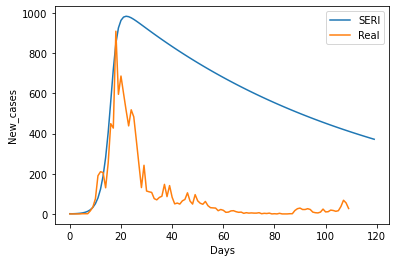

0.15000000000000002


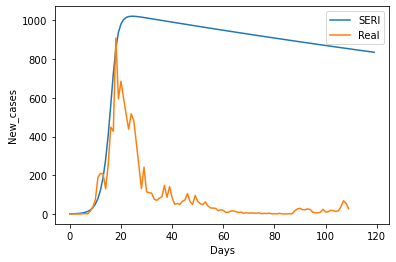

0.16


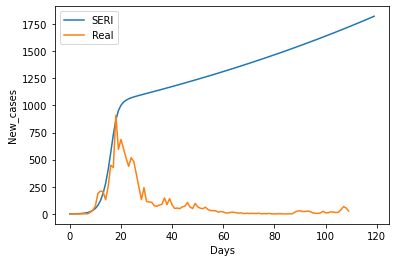

0.17


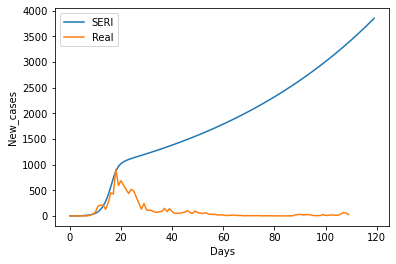

0.18000000000000002


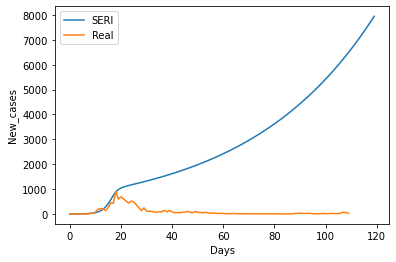

0.19


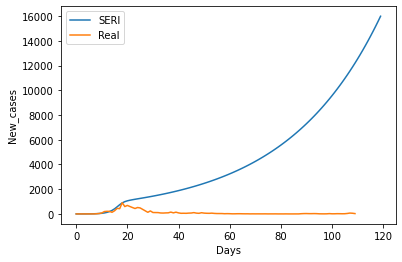

0.2


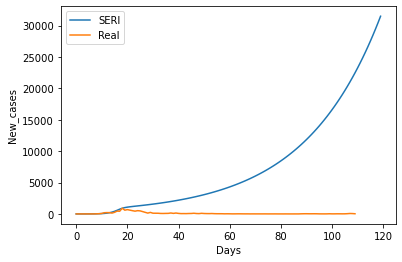

0.21000000000000002


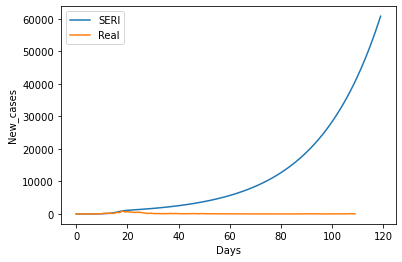

0.22


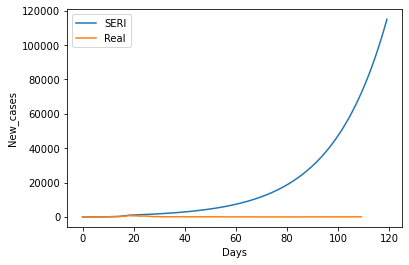

0.23


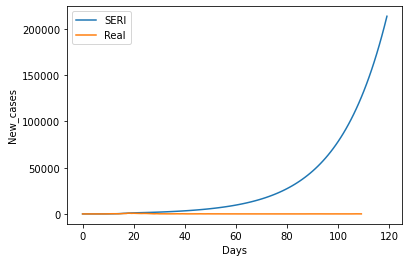

0.24000000000000002


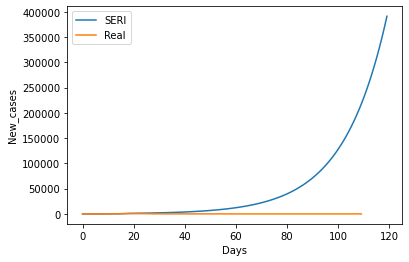

0.25


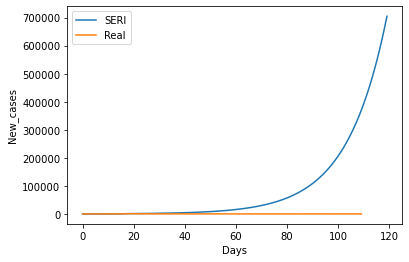

0.26


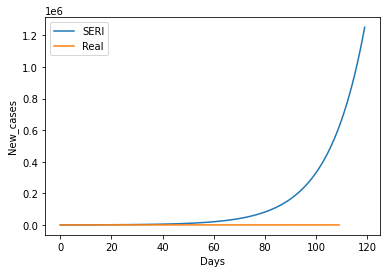

0.27


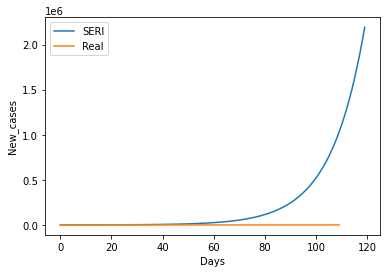

0.28


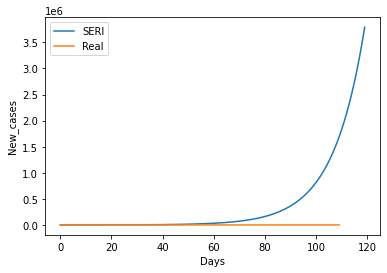

0.29000000000000004


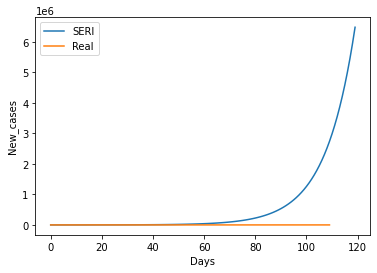

0.3


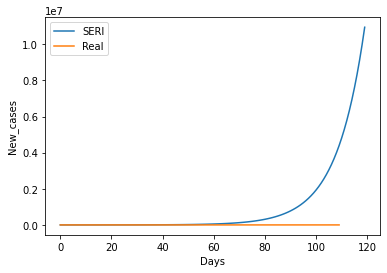

0.31


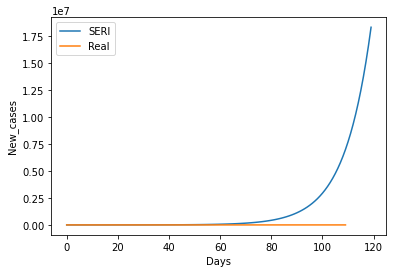

0.32


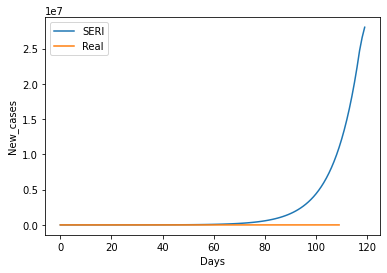

0.33


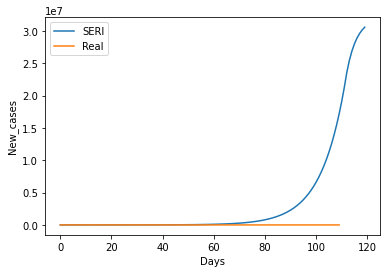

0.34


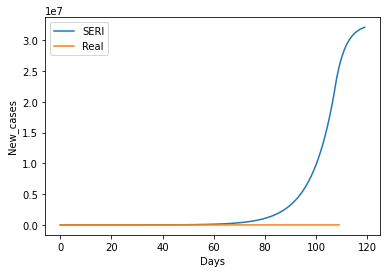

0.35000000000000003


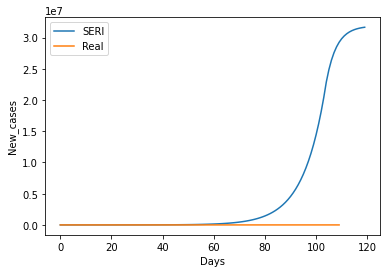

0.36000000000000004


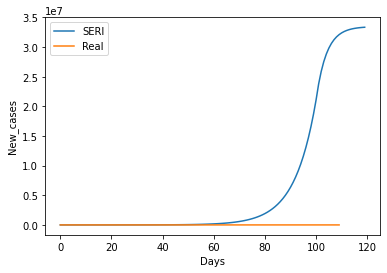

0.37


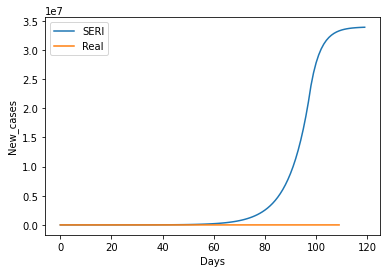

0.38


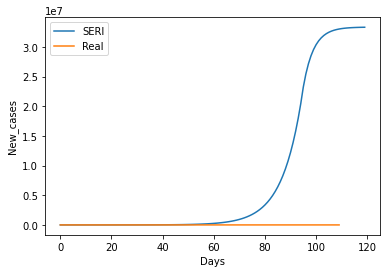

0.39


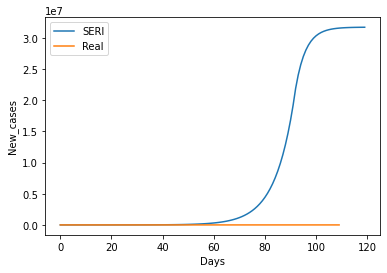

0.4


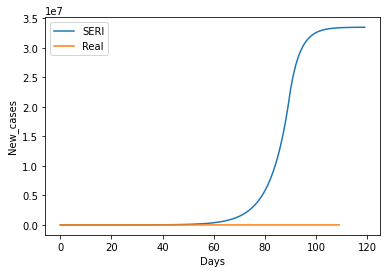

0.41000000000000003


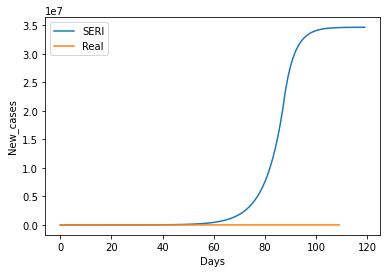

0.42000000000000004


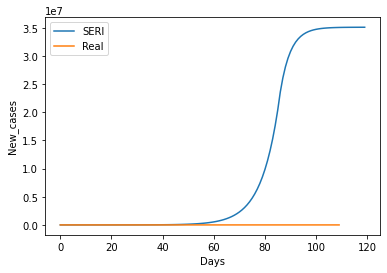

0.43


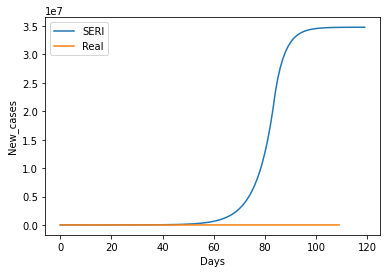

0.44


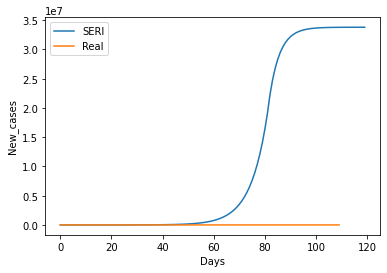

0.45


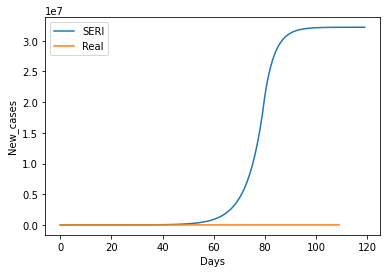

0.46


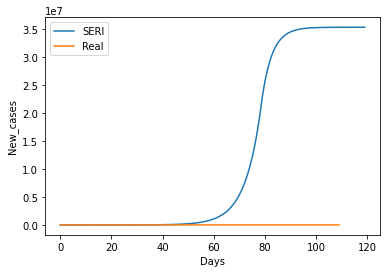

0.47000000000000003


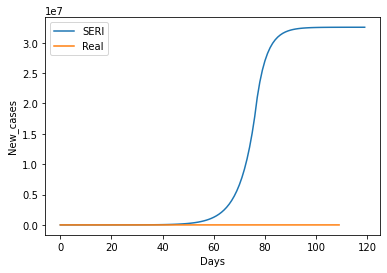

0.48000000000000004


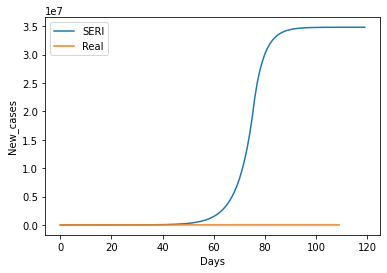

0.49


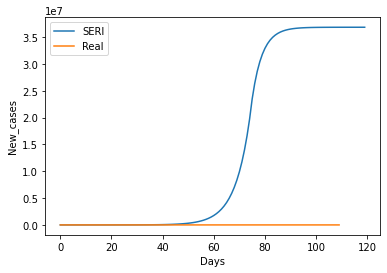

0.5


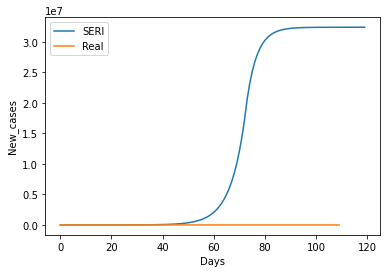

0.51


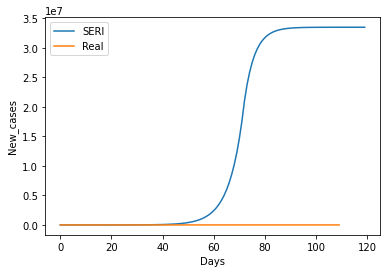

0.52


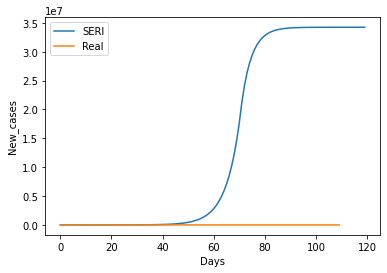

0.53


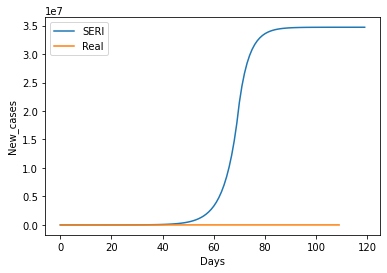

0.54


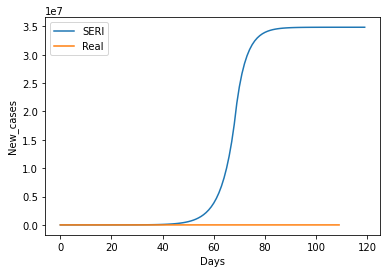

0.55


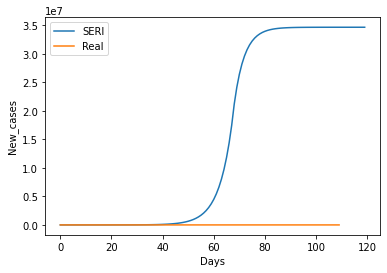

0.56


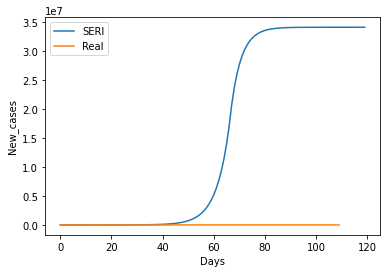

0.5700000000000001


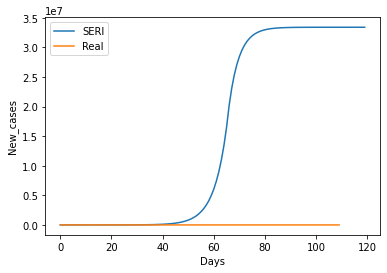

0.5800000000000001


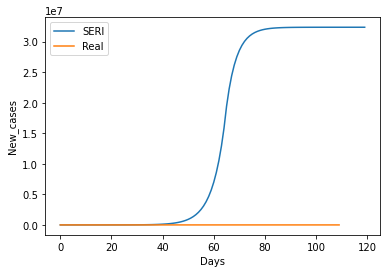

0.59


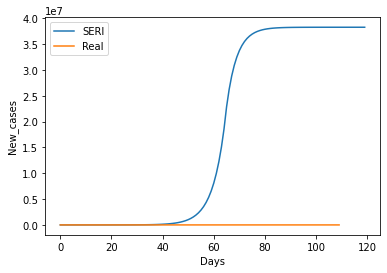

0.6


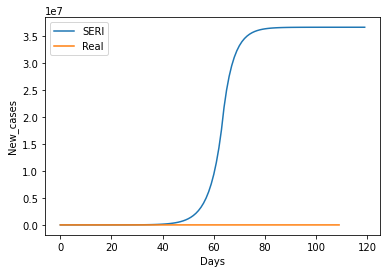

0.61


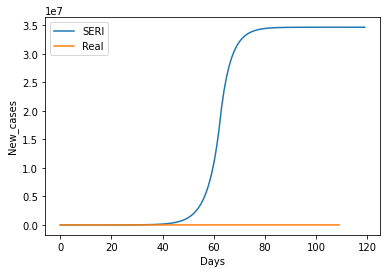

0.62


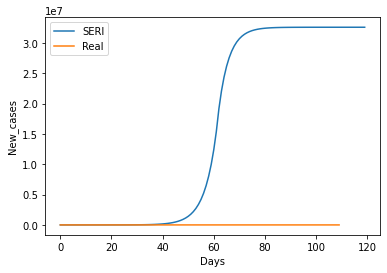

0.63


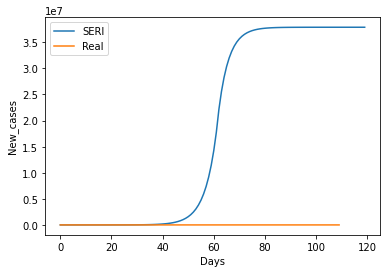

0.64


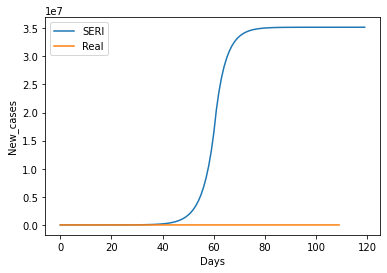

0.65


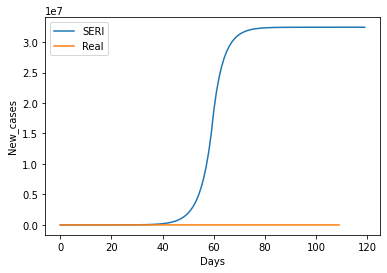

0.66


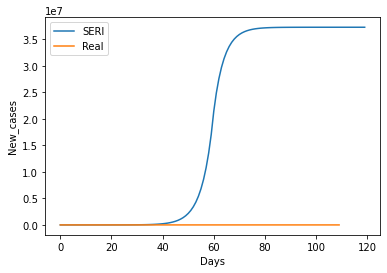

0.67


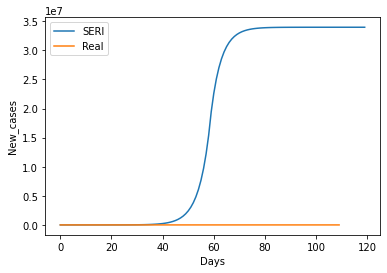

0.68


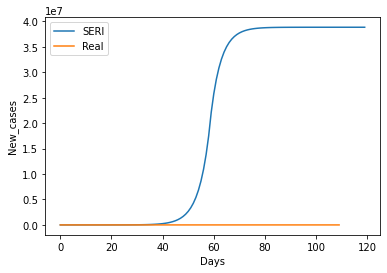

0.6900000000000001


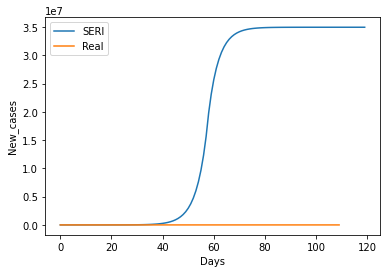

0.7000000000000001


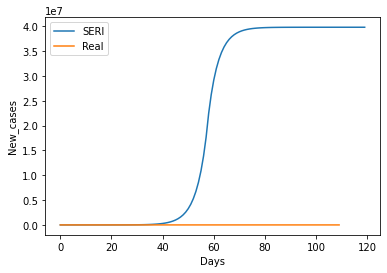

0.7100000000000001


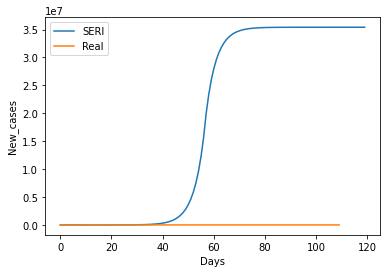

0.72


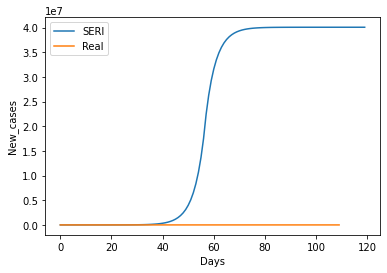

0.73


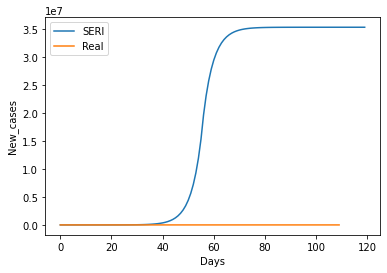

0.74


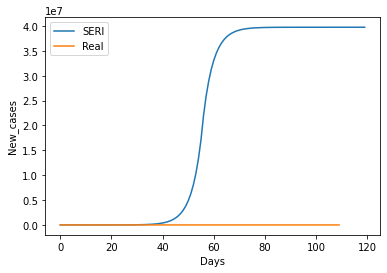

0.75


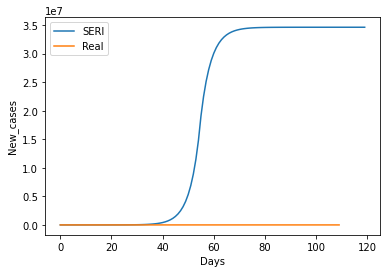

0.76


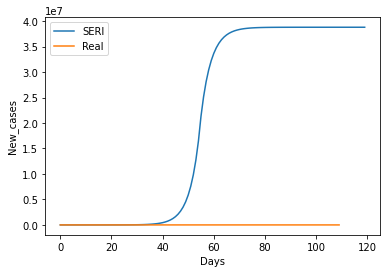

0.77


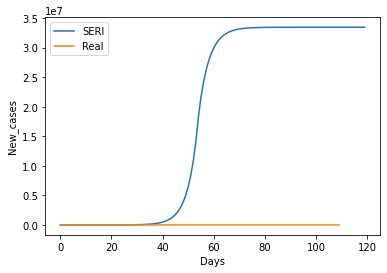

0.78


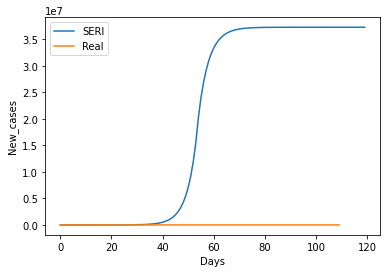

0.79


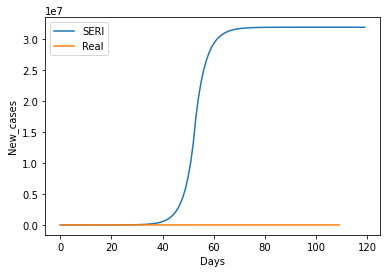

0.8


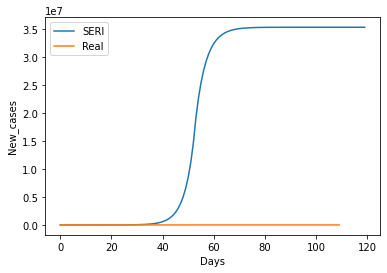

0.81


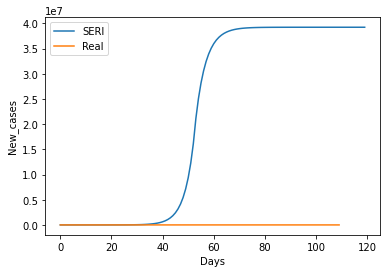

0.8200000000000001


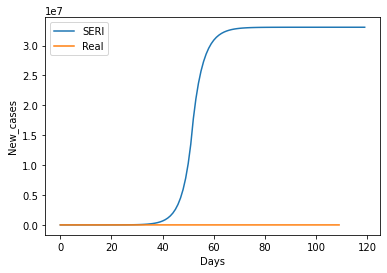

0.8300000000000001


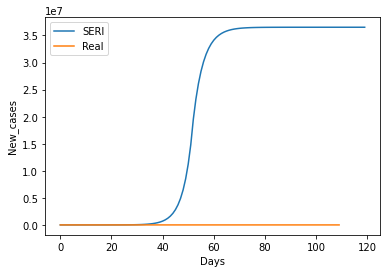

0.8400000000000001


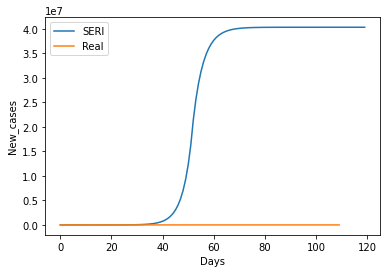

0.85


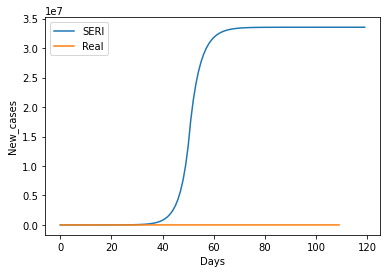

0.86


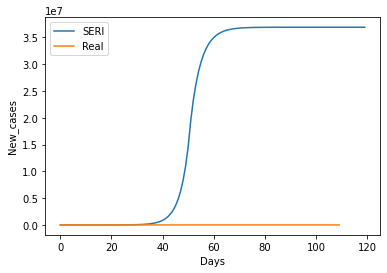

0.87


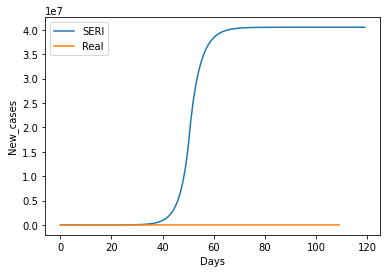

0.88


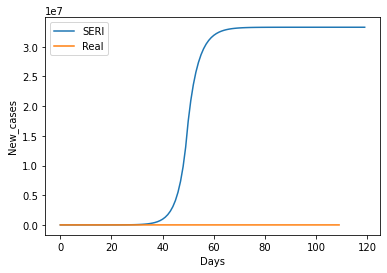

0.89


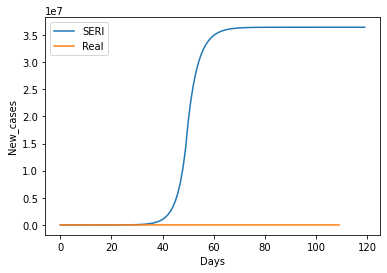

0.9


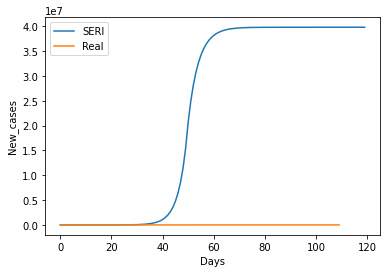

0.91


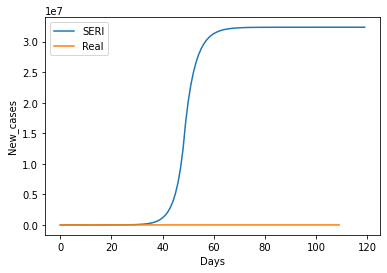

0.92


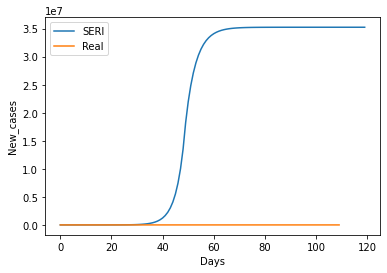

0.93


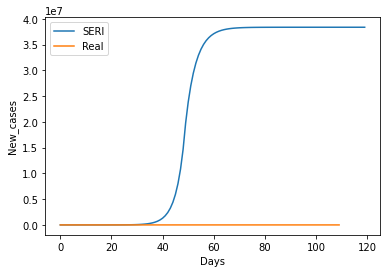

0.9400000000000001


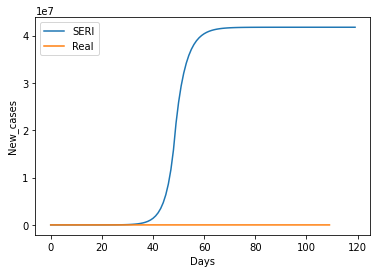

0.9500000000000001


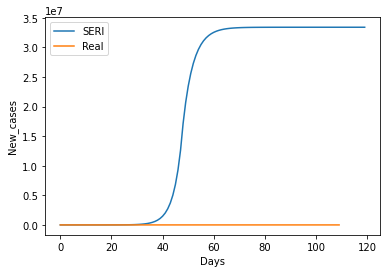

0.9600000000000001


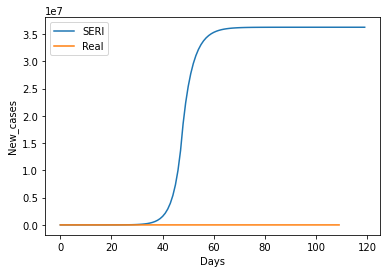

0.97


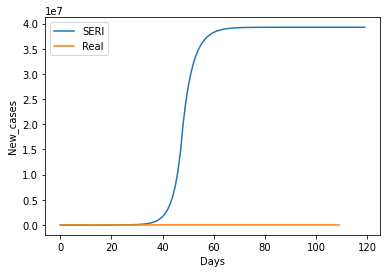

0.98


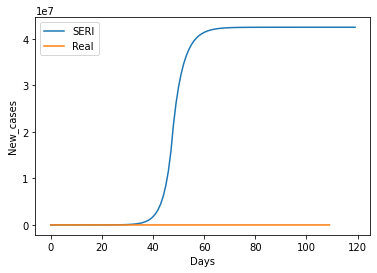

0.99


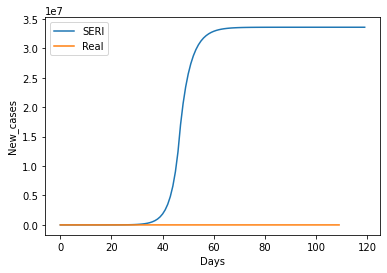

In [7]:
# 1인당 옮기는 감염자 수
########################### 질병관리본부 정은경 본부장 "2.5~3 사이라고 본다" (4월 10일) #############################################
감염률 = 2.75

# 초기 감염자 수(가정)
감염자 = 1

# 초기 잠복환자 수
잠복환자 = 0

# 지금까지 다 걸린 사람
총감염자 = 감염자 + 잠복환자

# 초기 격리환자 수
격리환자 = 0

# 원하는 지역의 총 인구(대한민국으로 가정)
총인구 = 51640000

# 현재 병에 걸릴 위험이 있는 사람들의 수
건강인 = 총인구 - 감염자 - 잠복환자

# 질병에 대한 두려움으로 생활패턴이 바뀐 건강한 사람의 수
무서운_건강인 = 0

#############################사회에 공포가 퍼져나가는 정도, 대구가 4.08이었으므로 조금 낮게 가정해보았음 ################
공포감 = 4  

# 환자가 n 명일 때 건강인은 무서운_건강인으로 전환됨
# 논문에서는 환자 1000명 발생 할 때 마다, 한 단위 증가한다고 가정
전환률 = 1/1000


# 병에 걸렸다고 회복되는 비율(투병기간 약 14일 이므로, 단순하게 1/14로 가정[논문])
회복률 = 1/14

# 코로나 바이러스 평균 잠복기간
# 질병관리본부 3월 발표자료 인용 (추가 조사 밑 반영되면 좋음)
잠복기간 = 4.1

# 코로나 증상 발현 후, 진단/격리까지 소요되는 시간
진단판정 = 4.6

# 회복한 환자
회복환자 = 0


###############################잔차제곱 결과값이 들어갈 리스트 준비#################################

잔차_결과들 = []


for j in np.arange(0.01, 1, 0.01):
    
    # 확진자 숫자를 넣을 리스트 준비
    scatt = []
    
    # 초기 감염자 수(가정)
    감염자 = 1

    # 초기 잠복환자 수
    잠복환자 = 0

    # 지금까지 다 걸린 사람
    총감염자 = 감염자 + 잠복환자

    # 초기 격리환자 수
    격리환자 = 0

    # 원하는 지역의 총 인구(대한민국으로 가정)
    총인구 = 51640000

    # 현재 병에 걸릴 위험이 있는 사람들의 수
    건강인 = 총인구 - 감염자 - 잠복환자

    # 질병에 대한 두려움으로 생활패턴이 바뀐 건강한 사람의 수
    무서운_건강인 = 0
    # 회복한 환자
    회복환자 = 0
    
    for i in range(0,120):
    ############################################# 델타를 j로 가정 ###########################################   
    # 0.01 부터 넉넉하게 0.4까지 0.01 단위로 올려서 넣어보면서 잔차제곱을 구한다.
    # 여기서는 사회적 거리두기로 통칭
        거리두기 = j



        scatt.append(감염자)
        건강인_df = non_fear(건강인, 감염자, 총인구, 공포감)
        무서운_건강인_df = fear(건강인, 무서운_건강인, 감염자, 총인구, 공포감, 거리두기)
        잠복환자_df = incubation(건강인, 무서운_건강인, 감염자, 총인구, 거리두기, 잠복환자)
        감염자_df = infected(잠복환자, 감염자)
        격리환자_df = quarantine(감염자)
        회복환자_df = recoverd()
    
        건강인 += 건강인_df
        무서운_건강인 += 무서운_건강인_df
        잠복환자 += 잠복환자_df
        감염자 += 감염자_df
        격리환자 += 격리환자_df
        회복환자 += 회복환자_df
        총감염자 += 감염자
        
    ################################## 잔차값을 구하는 식 #####################################
    
    # 이중 for 문이라 하나는 빠져나와야 합니다.
    # 120일 자료를 하나하나 꺼내서 계산하기 귀찮으니까 다시 for 문 줍니다.
    
    잔차값 = 0
    for k in range(0,120):
        
        잔차값 += (고로나.지역확진[k] - scatt[k])**2
    
        # 실제값과 예측값을 통해서 계산 하는거죠....?
        # 1일차의 실제값은 고로나.지역확진[0] 하시면 됩니다.
        # 1일차의 예측값은 scatt[0] 입니다.
        # for 문의 i가 날짜이고 120일 이니까 고로나.지역확진[k] 와 scatt[k]를 쓰시면 되겠죠......?
    
        
    # 결과는 여기에 저장됩니다.
    잔차_결과들.append([j, 잔차값])
    
    print(j)
    plt.plot([t for t in range(0,120)], [scatt[t] for t in range(0,120)])
    plt.plot([t for t in range(0,110)], [고로나.지역확진[t] for t in range(10,120)])
    plt.xlabel('Days')
    plt.ylabel('New_cases')
    plt.legend(['SERI', 'Real'])
    plt.show()

In [8]:
잔차_결과들

[[0.01, 5191442.923626483],
 [0.02, 5072770.190556837],
 [0.03, 4957997.255185783],
 [0.04, 4856035.623777717],
 [0.05, 4780731.7563052215],
 [0.060000000000000005, 4753868.068535322],
 [0.06999999999999999, 4810445.846179578],
 [0.08, 5008479.102259193],
 [0.09, 5448372.221259912],
 [0.09999999999999999, 6314423.452237908],
 [0.11, 7972232.209433942],
 [0.12, 11220186.671660742],
 [0.13, 17997718.16498916],
 [0.14, 33519747.44254934],
 [0.15000000000000002, 73000658.46890776],
 [0.16, 183325957.70946562],
 [0.17, 513343487.268541],
 [0.18000000000000002, 1540683857.8615062],
 [0.19, 4794602423.172151],
 [0.2, 15120825006.925575],
 [0.21000000000000002, 47640813540.29874],
 [0.22, 148695102589.62924],
 [0.23, 457541351696.15857],
 [0.24000000000000002, 1384276113817.626],
 [0.25, 4112235291472.5117],
 [0.26, 11987779388459.72],
 [0.27, 34288889463569.156],
 [0.28, 96248868292322.38],
 [0.29000000000000004, 265225888817655.12],
 [0.3, 717810737803270.5],
 [0.31, 1908971143330462.2],
 [0